In [1]:
import pandas as pd

data = pd.read_csv('Dataset.csv')


In [2]:
data.head(5)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


In [3]:
data.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Feature_1', 'Feature_2', 'Feature_3', 'romantic'],
      dtype='object')

In [4]:
data.dtypes


,0
school,object
sex,object
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,float64
Mjob,object
Fjob,object
reason,object


#Level - 1






0.44249707516159553


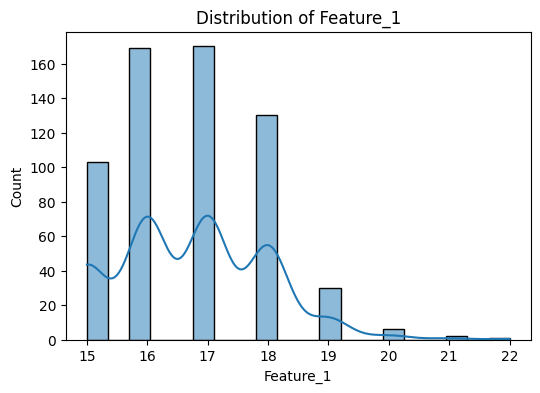

0.7204554605105801


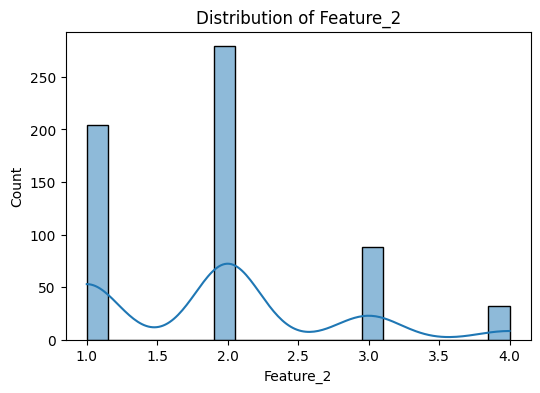

0.6419646902629215


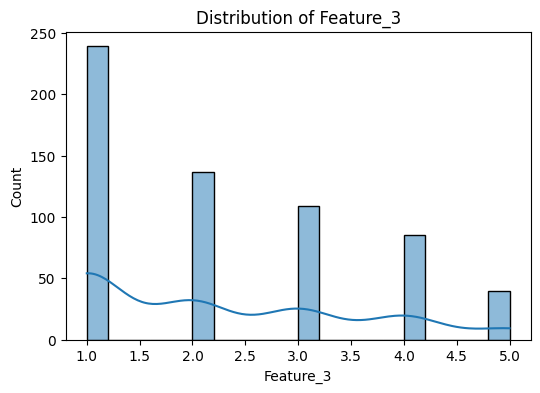

In [5]:
#All unknown column entries are float64
import matplotlib.pyplot as plt
import seaborn as sns

feature = ['Feature_1','Feature_2','Feature_3']
for f in feature:
  plt.figure(figsize=(6, 4))
  sns.histplot(data[f], kde=True, bins=20)
  plt.title(f"Distribution of {f}")
  print(data[f].skew())
  plt.show()

#kde is for smoothness of the curve to avoid discreteness

Feature_1 most likely represents age. Values range from 15-22 - clearly fits high school students. Most values at 16 and 17 - clearly follows real world demographics. But we need to further analyze to make sure that our analysis is correct.

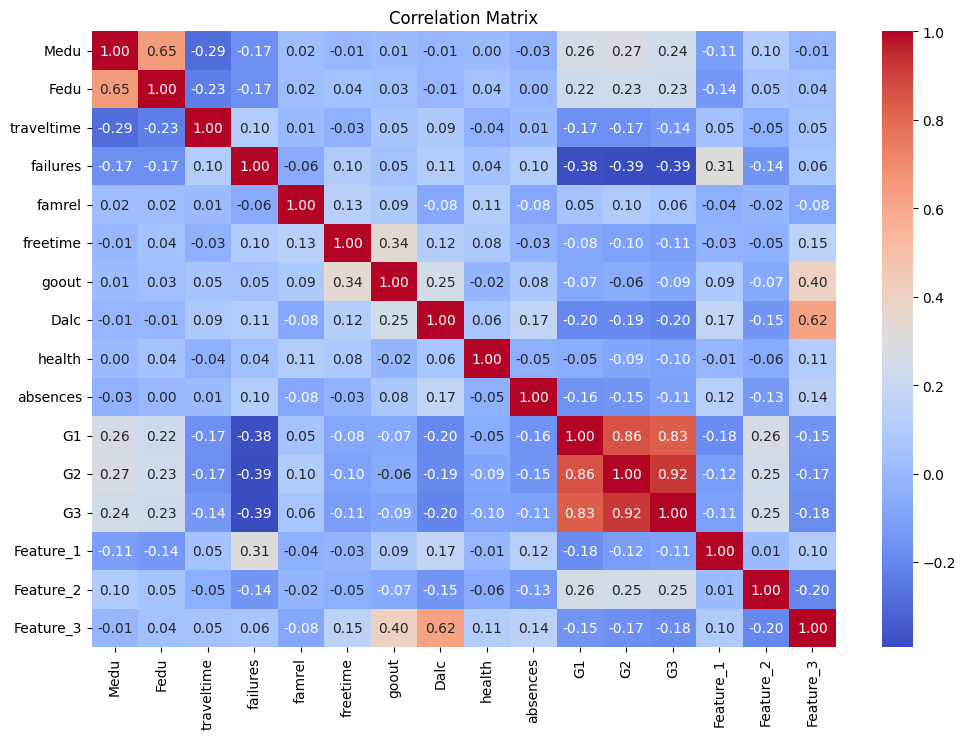

In [6]:
#correlation matrix with every numerical column
num_data = data.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##**Feature_1**

Now we analyse this heatmap. We can see two key relations for Feature_2. First, with Dalc (-0.15), showing students with higher values in this feature drink less during weekdays. Second, with final grades (+0.26), indicating better academic performance. The negative alcohol correlation and positive grade correlation confirm our assumption. Students who study more tend to drink less on weekdays and achieve higher grades. Also, the right-skewed distribution (0.72) shows most students have lower study times, which aligns with typical student behavior patterns. This evidence strongly suggests Feature_2 represents study time.

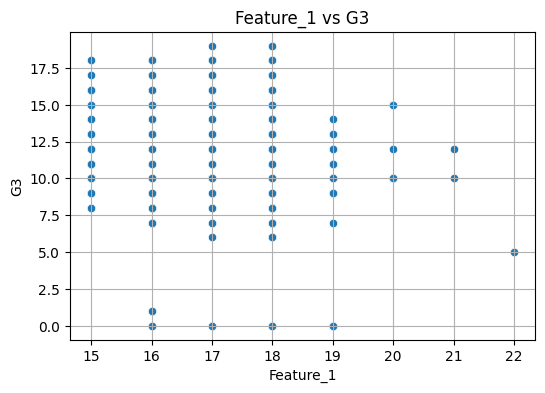

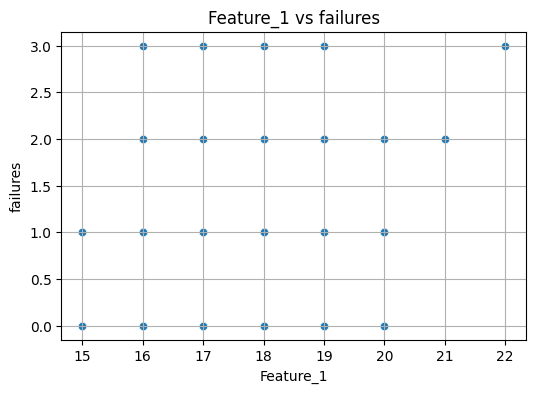

In [7]:
#Now we visualize how Feature_1 relates to grades and failure using scatterplots
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature_1', y='G3', data=data)
plt.title('Feature_1 vs G3')
plt.xlabel('Feature_1')
plt.ylabel('G3')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature_1', y='failures', data=data)
plt.title('Feature_1 vs failures')
plt.xlabel('Feature_1')
plt.ylabel('failures')
plt.grid(True)
plt.show()

Now we analyse the scatterplots of failures and G3 vs our Feature_1 which we believe to be age. Now, we can see that students with less age have 0-1 failures. Higher Feature_1 values (age 19-22) show a noticeable increase in failures (up to 3).
Older students tend to have more failures.
Analysing Feature_1 vs G3 plot, we can clearly see that older students tend to cluster around low grades while students of age 15-18 are spread all across.
So, all this analysis supports that Feature_1 is likely **Age**.


##**Feature_2**
Now we analyse the hotmap and the histogram graph for Feature_2.
Feature_2 has values ranging from 1 to 4 and is right-skewed(0.72), meaning most students fall in the lower range. It shows a small negative correlation with weekday alcohol use (Dalc = -0.15), suggesting that students with higher values in this feature tend to drink less during the week. There is also a slight positive correlation with final grades (+0.26). These patterns indicate a behavior related to time management and discipline. Considering all this, feature_2 closely matches study time, as students who study more tend to perform better academically and engage less in weekday drinking.

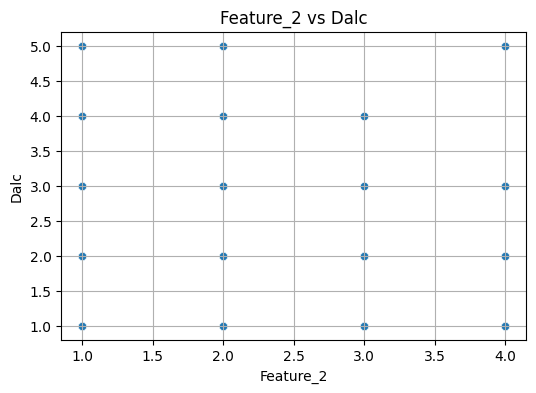

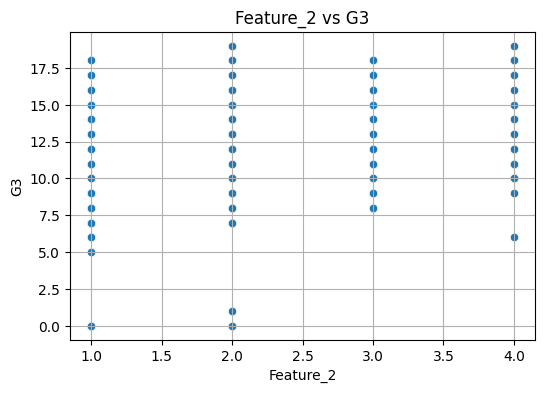

In [8]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature_2', y='Dalc', data=data)
plt.title('Feature_2 vs Dalc')
plt.xlabel('Feature_2')
plt.ylabel('Dalc')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature_2', y='G3', data=data)
plt.title('Feature_2 vs G3')
plt.xlabel('Feature_2')
plt.ylabel('G3')
plt.grid(True)
plt.show()

Now we analyse the scatterplots of Dalc and G3 vs our Feature_2 which we believe to be study time. We can see that students with lower study time (1.0-2.0) show higher alcohol consumption and a wider range of grades, including more failures. Higher Feature_2 values (study time 3.0-4.0) show noticeably lower alcohol consumption and cluster around higher grades. Students who study more tend to drink less and perform better academically. So, all this analysis supports that Feature_2 is likely Study Time.

##**Feature_3**

Now we analyze the heatmap and distribution for Feature_3. The histogram shows a right-skewed distribution (0.64), with most values clustered between 1.0-3.0. The heatmap reveals two strong correlations: a very high positive correlation with Dalc (0.62) and goout (0.40). This suggests students with higher Feature_3 values drink more alcohol both daily and when going out. There's also a moderate negative correlation with grades (-0.18 to -0.15), showing these students perform worse academically. These patterns match weekend alcohol consumption behavior, as heavy drinkers tend to go out more and have poorer grades. **Hence we lean towards Walc as our Feature_3.**

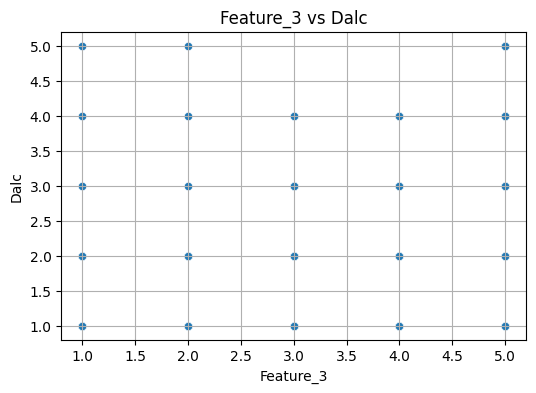

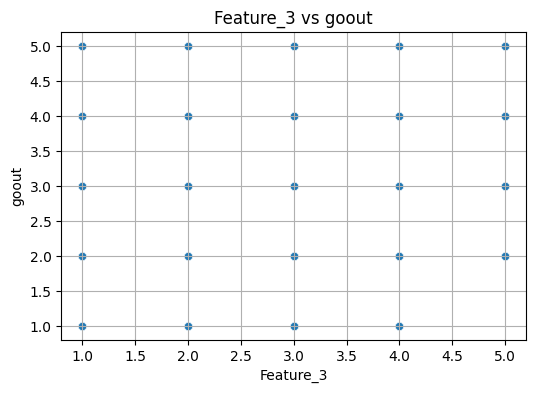

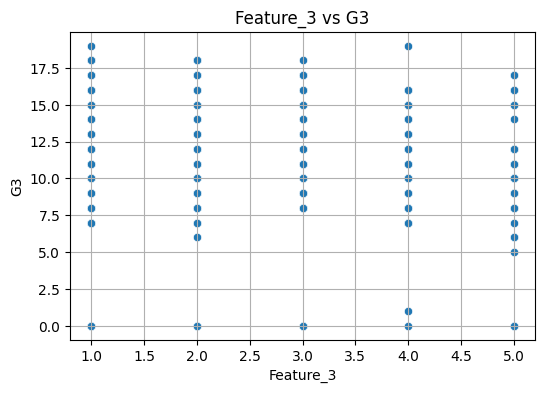

In [9]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature_3', y='Dalc', data=data)
plt.title('Feature_3 vs Dalc')
plt.xlabel('Feature_3')
plt.ylabel('Dalc')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature_3', y='goout', data=data)
plt.title('Feature_3 vs goout')
plt.xlabel('Feature_3')
plt.ylabel('goout')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature_3', y='G3', data=data)
plt.title('Feature_3 vs G3')
plt.xlabel('Feature_3')
plt.ylabel('G3')
plt.grid(True)
plt.show()

The scatterplots provide crucial insights - Feature_3 vs goout shows a particularly telling relationship, their Feature_3 values consistently increase. The combination of strong Dalc correlation and even stronger goout association, along with the negative grade relationship, makes a compelling case that Feature_3 represents **weekend alcohol consumption (Walc)**. The goout connection is especially revealing, as it captures the social dimension of student drinking behavior that often peaks on weekends.

#Level - 2

In [10]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0] #only choosing relevant column

missing_data
#This is the number of missing values in each column

,0
famsize,50
Fedu,73
traveltime,73
higher,76
freetime,45
absences,69
G2,35
Feature_1,38
Feature_2,46
Feature_3,39


We need to divide the columns into different categories in order to apply appropriate inputation strategies.

**1. Binary Categorical Variables -**


* famsize
* higher

**Imputation Strategy:** Fill with mode (most frequent category).



In [11]:
def mode_imputation(dataFrame, column):
    mode_value = dataFrame[column].mode()[0]
    dataFrame[column].fillna(mode_value, inplace=True)

mode_imputation(data,'higher')
mode_imputation(data,'famsize')

<ipython-input-11-76176d9ed651>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame[column].fillna(mode_value, inplace=True)


**2. Categorical and Continuous Variables -**

* Fedu
* traveltime
*freetime
* Feature_2 (most likely study-time category)
* School absences
* G2
* Feature_1 (most likely age)
* Feature_3 (most likely Walc)

**Imputation strategy -** Fill with median

In [12]:
def median_imputation(dataFrame, column):
    median_value = dataFrame[column].median()
    dataFrame[column].fillna(median_value, inplace=True)

median_imputation(data,'Fedu')
median_imputation(data,'traveltime')
median_imputation(data,'freetime')
median_imputation(data,'Feature_2')
median_imputation(data,'absences')
median_imputation(data,'G2')
median_imputation(data,'Feature_1')
median_imputation(data,'Feature_3')

<ipython-input-12-db97ff979ab5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame[column].fillna(median_value, inplace=True)


In [13]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0] #only choosing relevant column

missing_data

,0


No missing data. All null values have been filled.


For handling missing values in this student dataset:

Use the mode (most frequent value) for binary variables (like yes/no responses), as it preserves the most common choices in the data.

Use the median for categorical and continuous numerical values, as it provides a robust central estimate that isn't skewed by outliers.

#Level - 3

###**How does parental education (Medu/Fedu) correlate with student grades?**

<ipython-input-14-378b1d77b2c9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medu', y='G3', data=data, palette='Blues')


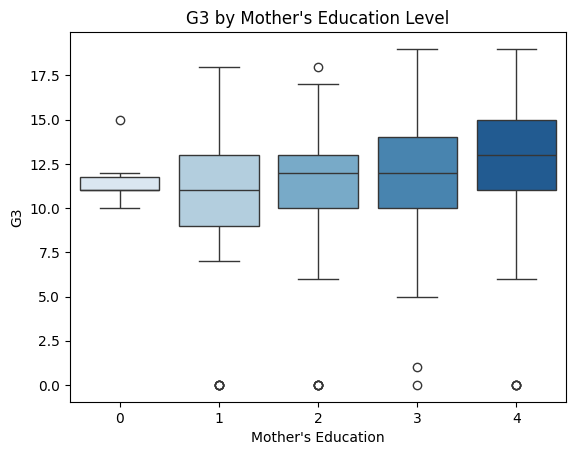

<ipython-input-14-378b1d77b2c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fedu', y='G3', data=data, palette='Blues')


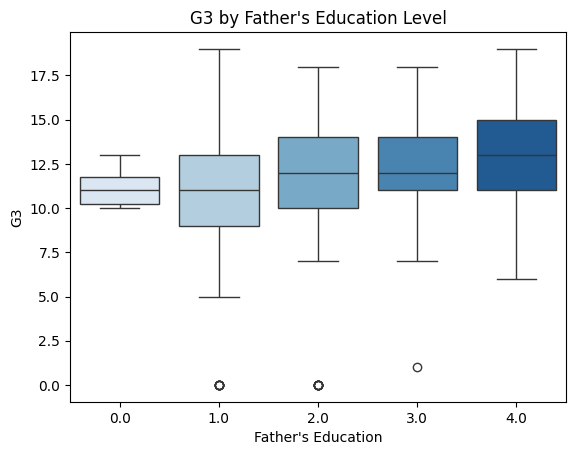

In [14]:
sns.boxplot(x='Medu', y='G3', data=data, palette='Blues')
plt.title("G3 by Mother's Education Level")
plt.xlabel("Mother's Education")
plt.ylabel("G3")
plt.show()
sns.boxplot(x='Fedu', y='G3', data=data, palette='Blues')
plt.title("G3 by Father's Education Level")
plt.xlabel("Father's Education")
plt.ylabel("G3")
plt.show()

The analysis reveals a clear link between a mother's education level and student academic performance, with higher maternal education correlating to significantly better grades. In contrast, the father's education level shows little measurable impact on grades. This suggests mothers may play a more influential role in their children's educational development.

###**How does weekday alcohol consumption impact school absences?**

<ipython-input-15-90292a36b94d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dalc', y='absences', data=data, palette='Reds')


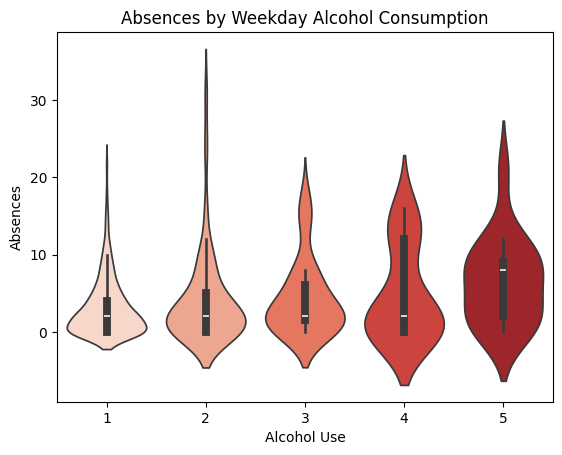

In [15]:
sns.violinplot(x='Dalc', y='absences', data=data, palette='Reds')
plt.title("Absences by Weekday Alcohol Consumption")
plt.xlabel("Alcohol Use")
plt.ylabel("Absences")
plt.show()

The graph reveals a concerning trend between weekday alcohol consumption and school absences. As alcohol use increases from level 1 to 5, absences rise dramatically from about 5 days to 25-30 days. The most significant jumps occur between levels 3-4 and 4-5, suggesting that heavy drinking leads to severe attendance problems. This clear pattern indicates that alcohol use significantly disrupts students' school participation.

###**Does travel time to school impact academic performance?**

<ipython-input-16-bb431d00d5cf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traveltime', y='G3', data=data, palette='Reds')


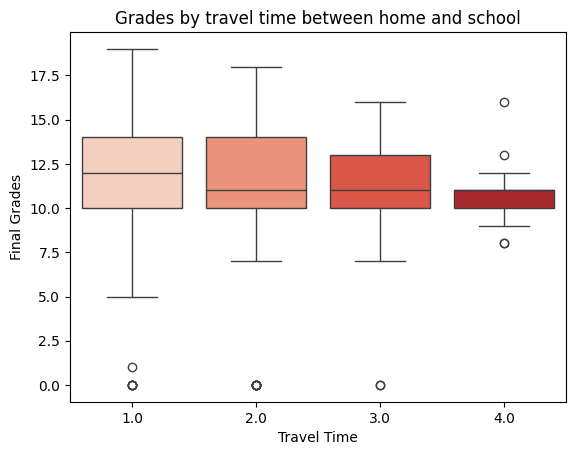

In [16]:
sns.boxplot(x='traveltime', y='G3', data=data, palette='Reds')
plt.title("Grades by travel time between home and school")
plt.xlabel("Travel Time")
plt.ylabel("Final Grades")
plt.show()

The graph clearly shows that students with longer travel times to school tend to get lower grades. Those with the shortest commute average the highest grades, while students with the longest travel time see their grades drop significantly. This suggests that spending too much time commuting may leave students with less energy or time for studying.

###**Does romantic relationship status affect grades?**

<ipython-input-17-f1478f8f28c8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='romantic', y='G3', data=data, palette='Blues')


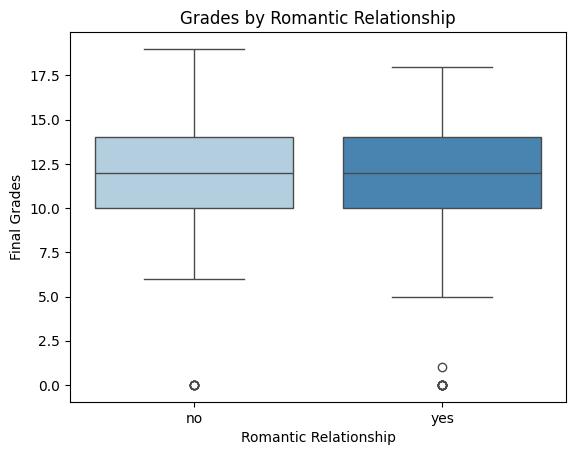

In [17]:
sns.boxplot(x='romantic', y='G3', data=data, palette='Blues')
plt.title("Grades by Romantic Relationship")
plt.xlabel("Romantic Relationship")
plt.ylabel("Final Grades")
plt.show()

The graph shows students not in romantic relationships ("no") tend to score slightly higher grades than those in relationships ("yes"). While the difference is small, it suggests relationships might distract slightly from studies. Many students still do well in both areas, showing balance is possible.

###**Do students in urban vs rural areas report different socializing habits with friends?**

<ipython-input-18-3fe3163a066a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='address', y='goout', data=data, palette='Reds')


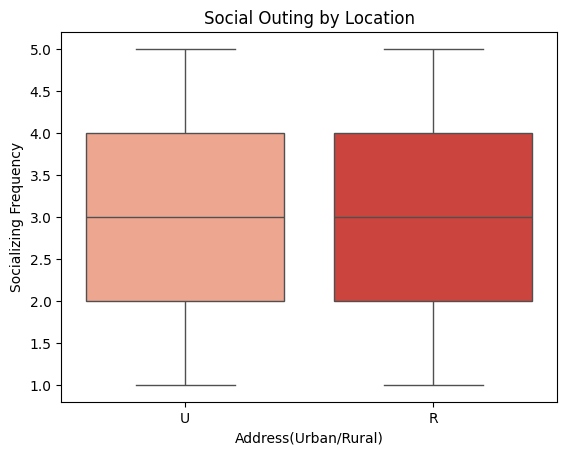

In [18]:
sns.boxplot(x='address', y='goout', data=data, palette='Reds')
plt.title("Social Outing by Location")
plt.xlabel("Address(Urban/Rural)")
plt.ylabel("Socializing Frequency")
plt.show()

The box plot comparing socializing frequency between urban (U) and rural (R) residents reveals that there is no significant difference in how often people go out socially based on their location.This suggests that living in an urban or rural area does not greatly influence the frequency of social outings, indicating that other factors—such as personal habits or social circles—may play a more important role in determining how often individuals engage in social activities.

#Level - 4

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [20]:
features = [
    'sex', 'address', 'famsize', 'Pstatus', 'guardian',
    'Medu', 'Fedu', 'Mjob', 'Fjob',
    'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences',
    'activities', 'internet',
    'Feature_1', 'Feature_2', 'Feature_3',
    'G1', 'G2', 'G3'
]

In [21]:
X = pd.get_dummies(data[features], drop_first=True)
y = data['romantic'].map({'yes': 1, 'no': 0})

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###**Logistic Regression**

In [24]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       121
           1       0.41      0.30      0.34        74

    accuracy                           0.57       195
   macro avg       0.52      0.52      0.51       195
weighted avg       0.55      0.57      0.55       195

[[89 32]
 [52 22]]


###**Decision Tree Classifier**

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       121
           1       0.45      0.46      0.46        74

    accuracy                           0.58       195
   macro avg       0.56      0.56      0.56       195
weighted avg       0.59      0.58      0.59       195

[[80 41]
 [40 34]]


###**Random Tree Classifier**

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       121
           1       0.47      0.24      0.32        74

    accuracy                           0.61       195
   macro avg       0.56      0.54      0.52       195
weighted avg       0.58      0.61      0.57       195

[[101  20]
 [ 56  18]]


###**Gaussian Naive Bayes**

In [27]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.64      0.72      0.67       121
           1       0.41      0.32      0.36        74

    accuracy                           0.57       195
   macro avg       0.52      0.52      0.52       195
weighted avg       0.55      0.57      0.56       195

[[87 34]
 [50 24]]


###**K-Nearest Neighbors**

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64       121
           1       0.31      0.22      0.25        74

    accuracy                           0.52       195
   macro avg       0.45      0.46      0.45       195
weighted avg       0.49      0.52      0.50       195

[[85 36]
 [58 16]]


###**Random Forest Tuning**

In [29]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [30]:
y_pred_rf_grid = rf_grid.predict(X_test_scaled)

print(classification_report(y_test, y_pred_rf_grid))
print(confusion_matrix(y_test, y_pred_rf_grid))

              precision    recall  f1-score   support

           0       0.63      0.94      0.75       121
           1       0.46      0.08      0.14        74

    accuracy                           0.62       195
   macro avg       0.54      0.51      0.45       195
weighted avg       0.56      0.62      0.52       195

[[114   7]
 [ 68   6]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


###**Decision Forest Tuning**

In [31]:
dt_params = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2]
}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='f1')
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

In [32]:
y_pred_dt_grid = dt_grid.predict(X_test_scaled)

print(classification_report(y_test, y_pred_dt_grid))
print(confusion_matrix(y_test, y_pred_dt_grid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.38      1.00      0.55        74

    accuracy                           0.38       195
   macro avg       0.19      0.50      0.28       195
weighted avg       0.14      0.38      0.21       195

[[  0 121]
 [  0  74]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no